<a href="https://colab.research.google.com/github/Asma-Ahmed-Aqil-AL-Zubaidi/T5_week2_project2/blob/main/Weekly_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/T5/Week 2/2 - Foundations of Machine Learning/5- Weekly Project/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8602,10:37:00,Tuesday,31-50,Male,High school,Owner,Above 10yr,Other,Owner,5-10yrs,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Moving Backward,Slight Injury


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df.shape

(12316, 32)

In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [ ]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [ ]:
df.isnull().sum().sum()

20057

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop('Defect_of_vehicle', axis=1)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

df['Time'] = df['Time'].dt.time

<ipython-input-443-191316410adb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [ ]:
print(df.columns)

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [ ]:
df['Educational_level'].fillna(df['Educational_level'].mode()[0], inplace=True)

In [ ]:
#modes = df.mode().iloc[0]


#df.fillna(modes, inplace=True)

In [ ]:
categorical_cols = ['Day_of_week', 'Sex_of_driver', 'Educational_level', 'Type_of_vehicle', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Cause_of_accident']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,579
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12




1.      Age_band_of_driver           12316 non-null  object
2.      Service_year_of_vehicle      12316 non-null  object



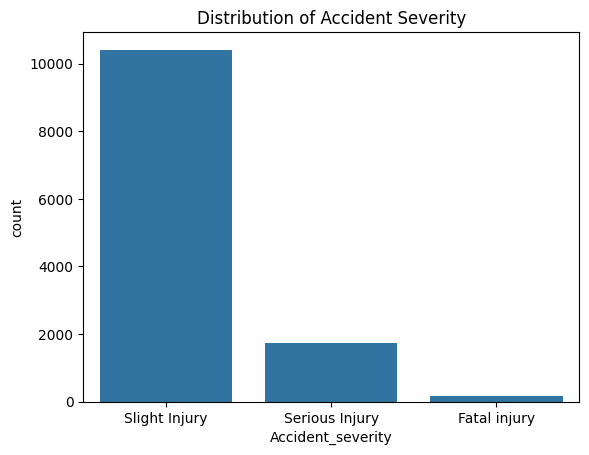

In [ ]:
import matplotlib.pyplot as plt#خطوره الحادث
import seaborn as sns
sns.countplot(x='Accident_severity', data=df)
plt.title('Distribution of Accident Severity')
plt.show()

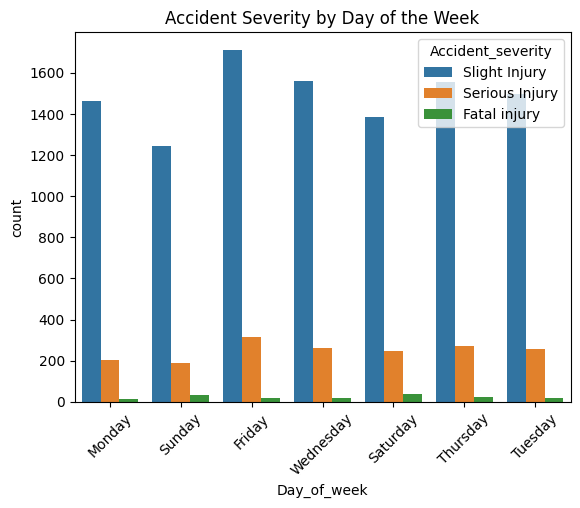

In [ ]:
import matplotlib.pyplot as plt#اليوم
sns.countplot(x='Day_of_week', hue='Accident_severity', data=df)
plt.title('Accident Severity by Day of the Week')
plt.xticks(rotation=45)
plt.show()

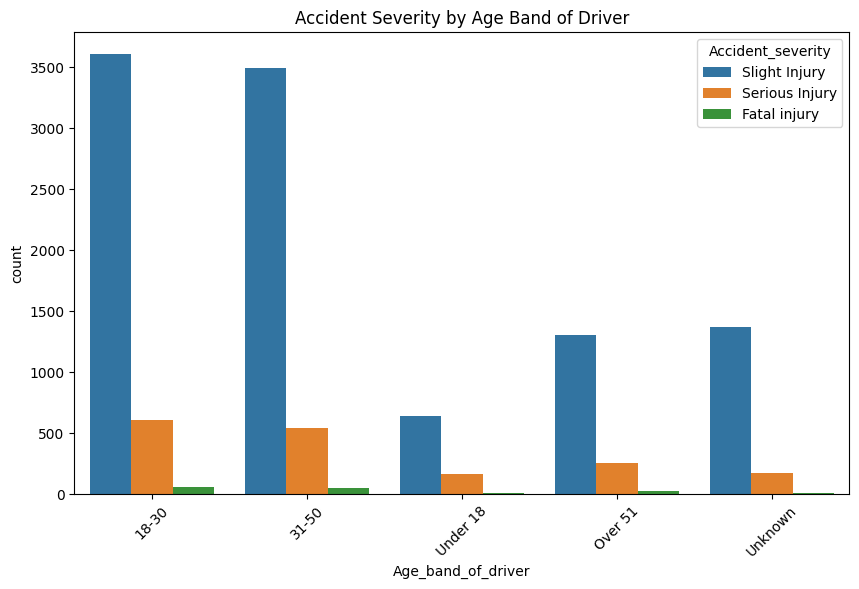

In [ ]:
plt.figure(figsize=(10, 6))#عمره
sns.countplot(x='Age_band_of_driver', hue='Accident_severity', data=df)
plt.title('Accident Severity by Age Band of Driver')
plt.xticks(rotation=45)
plt.show()


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


numerical_cols = ['Number_of_vehicles_involved', 'Number_of_casualties']


scaler_minmax = MinMaxScaler()
df[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])

scaler_standard = StandardScaler()
df[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])


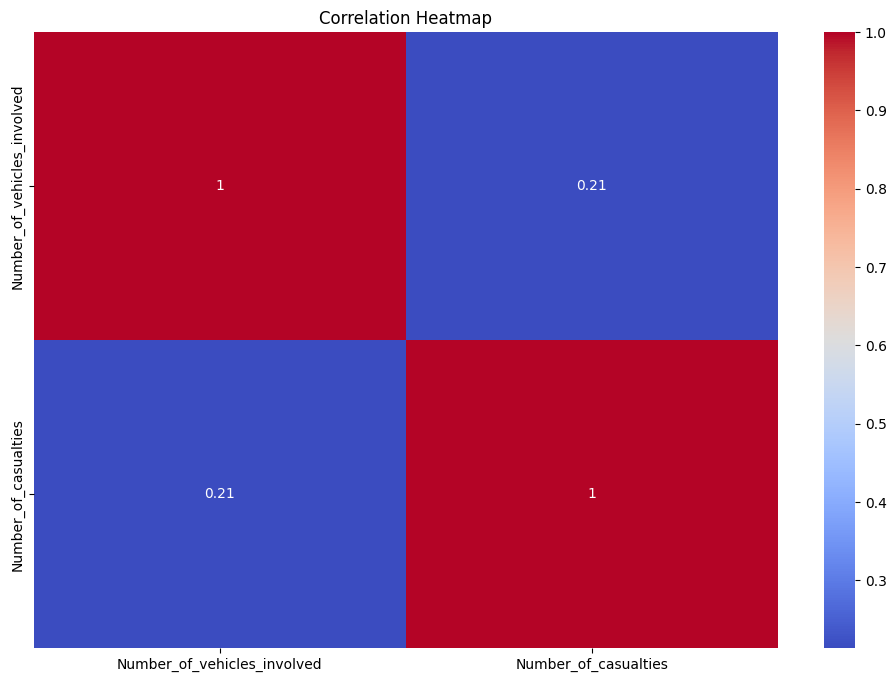

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
le = LabelEncoder()


df['Day_of_week'] = le.fit_transform(df['Day_of_week'])


df['Educational_level'] = le.fit_transform(df['Educational_level'])


df['Owner_of_vehicle'] = le.fit_transform(df['Owner_of_vehicle'])

In [ ]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

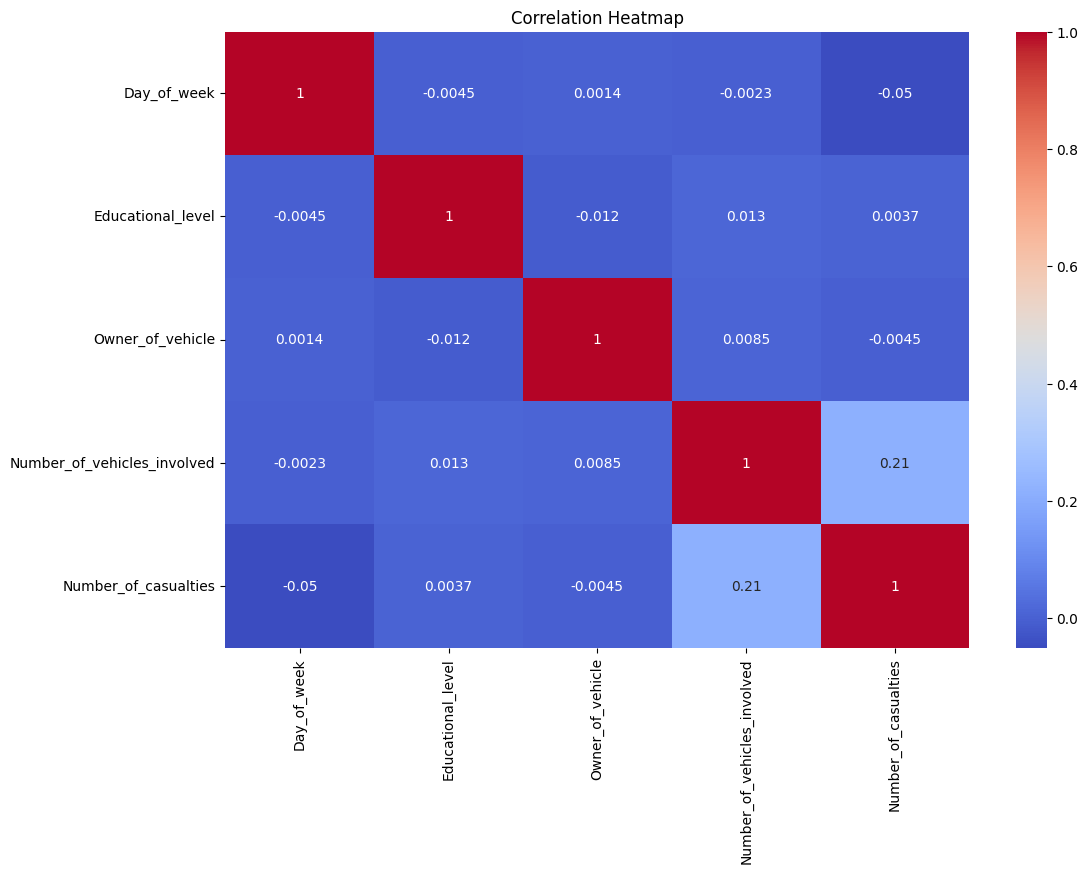

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


cols_to_encode = ['Sex_of_driver', 'Type_of_vehicle']


encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')


encoded_data = encoder.fit_transform(df[cols_to_encode])


encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols_to_encode))


df = df.drop(cols_to_encode, axis=1)
df = pd.concat([df, encoded_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


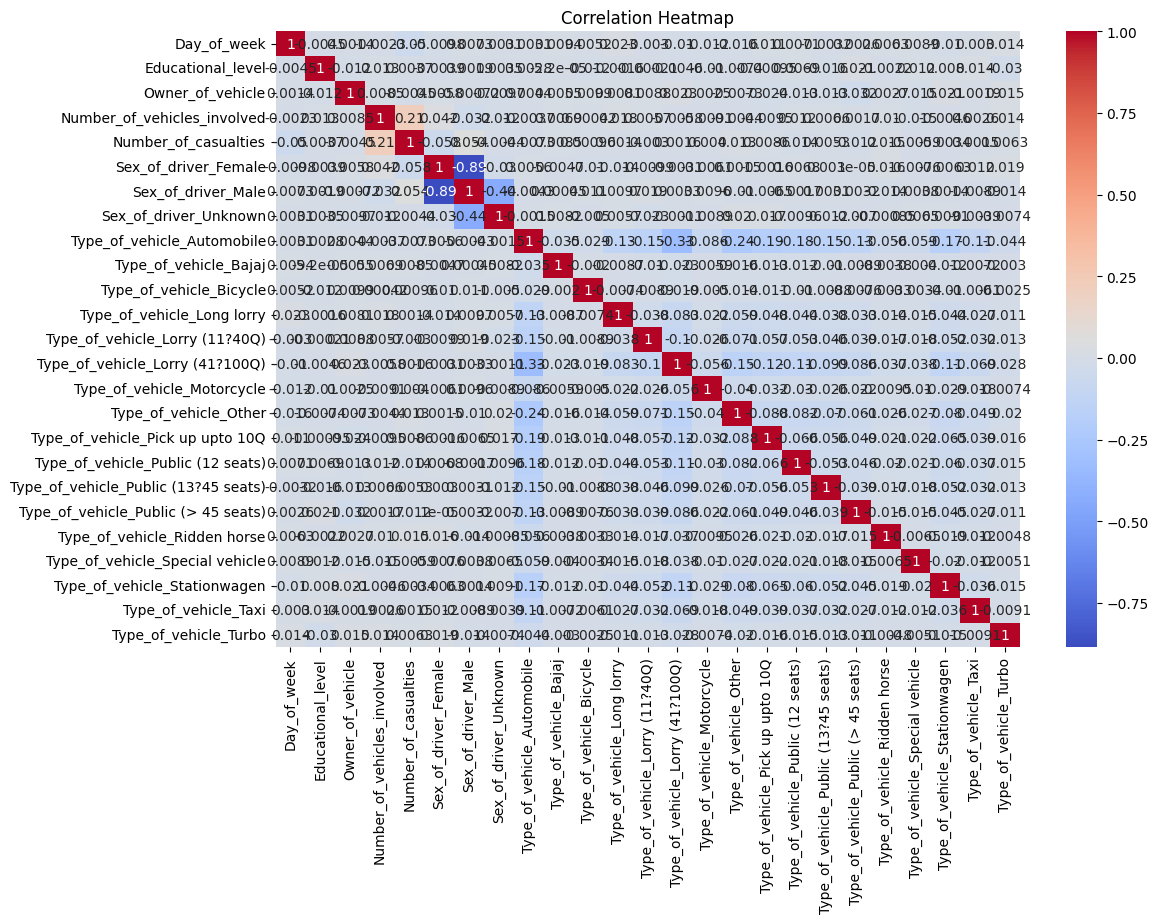

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

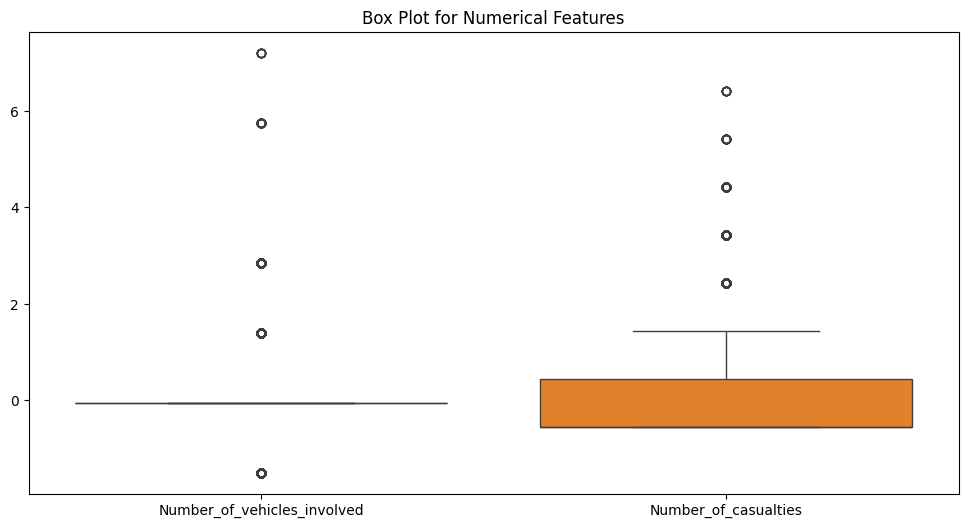

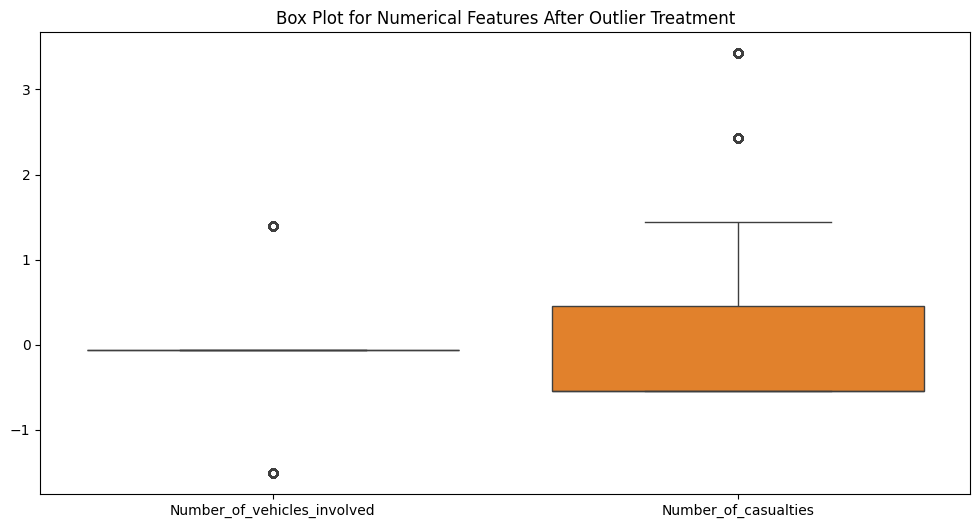

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
# box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot for Numerical Features')
plt.show()


upper_cap = df['Number_of_vehicles_involved'].quantile(0.95)
df['Number_of_vehicles_involved'] = np.where(df['Number_of_vehicles_involved'] > upper_cap, upper_cap, df['Number_of_vehicles_involved'])


upper_trim = df['Number_of_casualties'].quantile(0.99)
df = df[df['Number_of_casualties'] <= upper_trim]


plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot for Numerical Features After Outlier Treatment')
plt.show()


In [ ]:
df['Severity_index'] = df['Number_of_vehicles_involved'] * df['Number_of_casualties']


df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Owner_of_vehicle',
       'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity', 'Sex_of_driver_Female', 'Sex_of_driver_Male',
       'Sex_of_driver_Unknown', 'Type_of_vehicle_Automobile',
       'Type_of_vehicle_Bajaj', 'Type_of_vehicle_Bicycle',
       'Type_of_vehicle_Long lorry', 'Type_of_vehicle_Lorry (11?40Q)',
       'Type_of_vehicle_Lorry (41?100Q)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12197 entries, 0 to 12315
Data columns (total 51 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Time                                  12197 non-null  object 
 1   Day_of_week                           12197 non-null  int64  
 2   Age_band_of_driver                    12197 non-null  object 
 3   Educational_level                     12197 non-null  int64  
 4   Vehicle_driver_relation               11623 non-null  object 
 5   Driving_experience                    12197 non-null  object 
 6   Owner_of_vehicle                      12197 non-null  int64  
 7   Service_year_of_vehicle               12197 non-null  object 
 8   Defect_of_vehicle                     7810 non-null   object 
 9   Area_accident_occured                 12197 non-null  object 
 10  Lanes_or_Medians                      12197 non-null  object 
 11  Road_allignment     

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [ ]:
colummns=df[[ 'Day_of_week','Owner_of_vehicle','Number_of_vehicles_involved', 'Number_of_casualties']]
correlation_matrix=colummns.corr()#يجب ان يكون نوع الاعمده انتقر

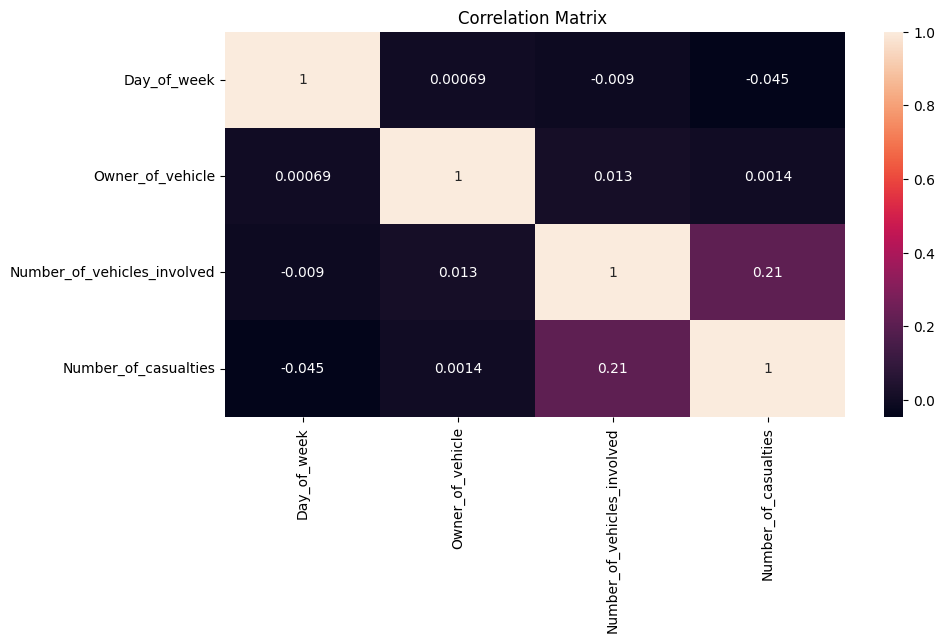

In [ ]:
plt.figure(figsize=(10,5))

sns.heatmap(correlation_matrix, annot =True)
plt.title("Correlation Matrix ")
plt.show()

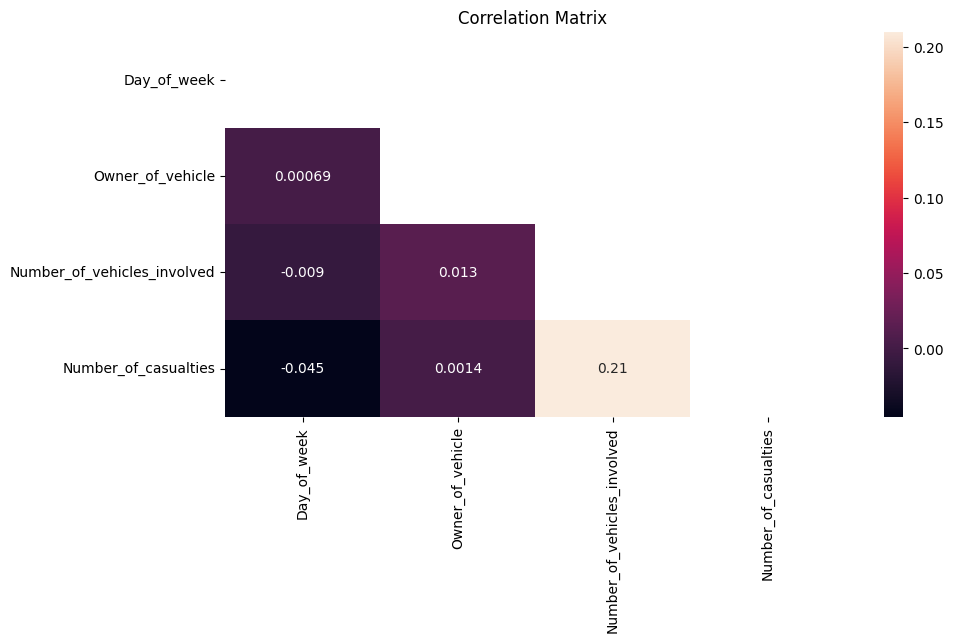

In [ ]:
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Use correlation_matrix here
sns.heatmap(correlation_matrix, annot =True, mask=mask)
plt.title("Correlation Matrix ")
plt.show()

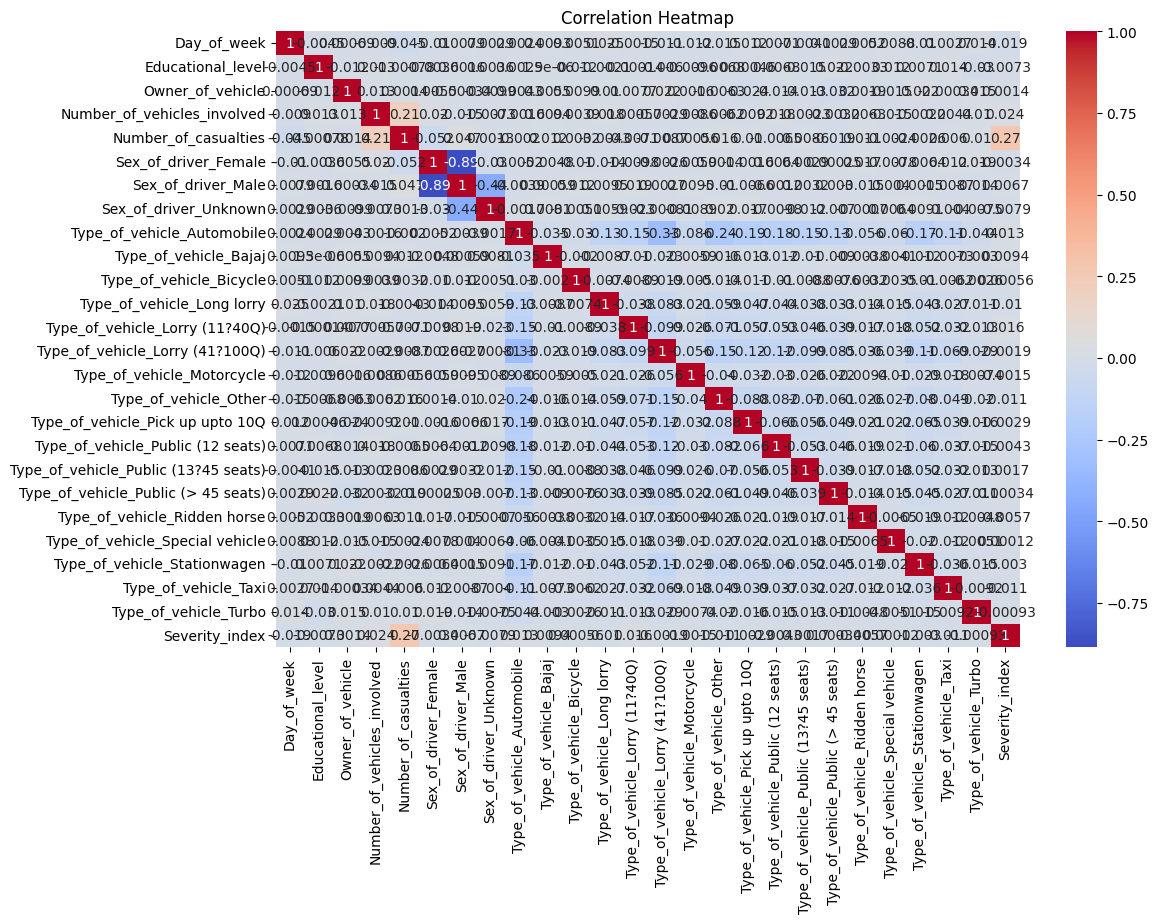

In [ ]:
import matplotlib.pyplot as plt# Heatmap
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Owner_of_vehicle',
       'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity', 'Sex_of_driver_Female', 'Sex_of_driver_Male',
       'Sex_of_driver_Unknown', 'Type_of_vehicle_Automobile',
       'Type_of_vehicle_Bajaj', 'Type_of_vehicle_Bicycle',
       'Type_of_vehicle_Long lorry', 'Type_of_vehicle_Lorry (11?40Q)',
       'Type_of_vehicle_Lorry (41?100Q)

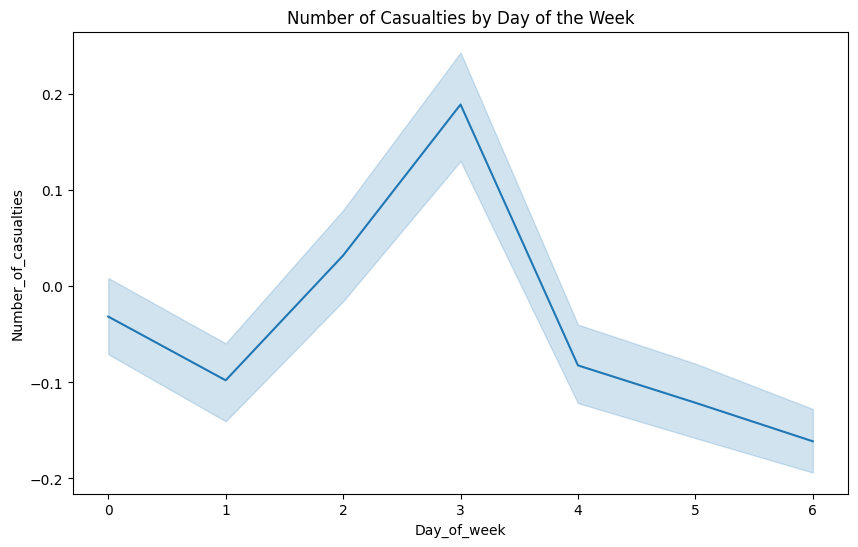

In [ ]:
import matplotlib.pyplot as plt# Line plots
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day_of_week', y='Number_of_casualties', data=df)
plt.title('Number of Casualties by Day of the Week')
plt.show()

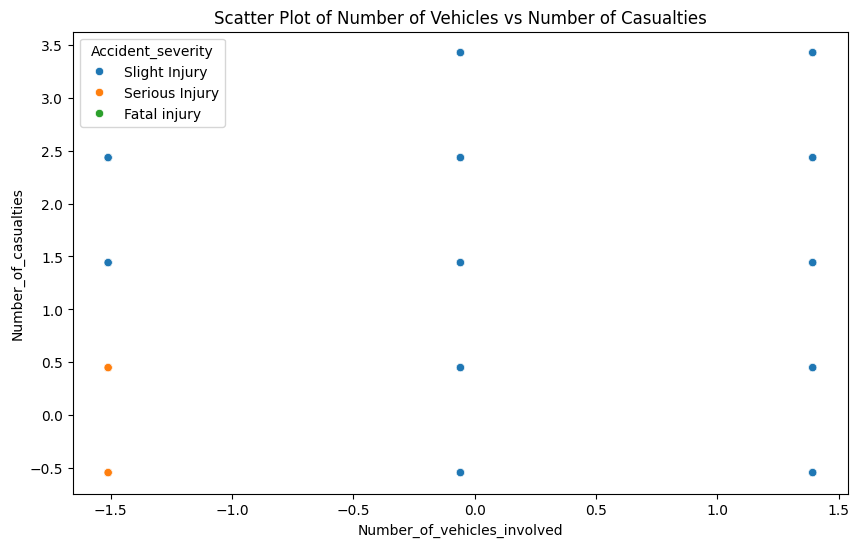

In [ ]:
import matplotlib.pyplot as plt# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_vehicles_involved', y='Number_of_casualties', hue='Accident_severity', data=df)
plt.title('Scatter Plot of Number of Vehicles vs Number of Casualties')
plt.show()

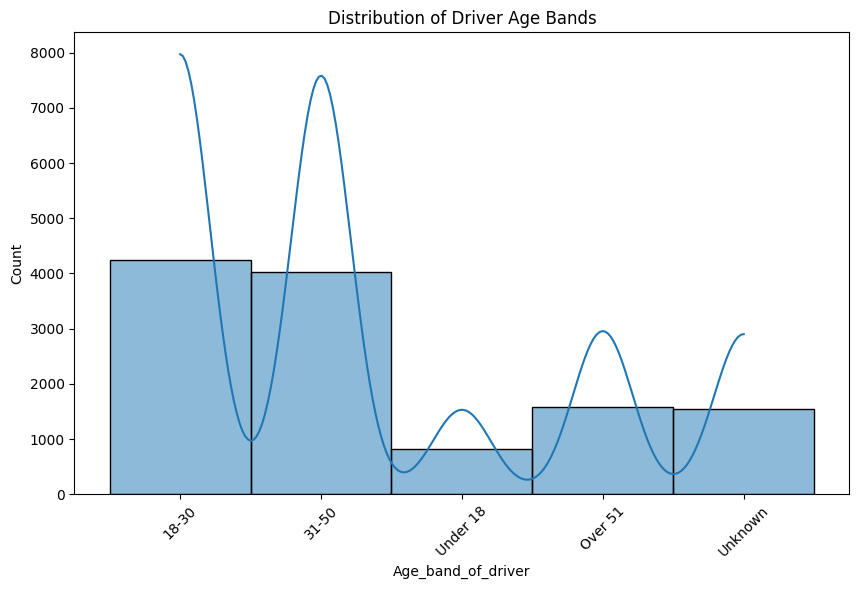

In [ ]:
import matplotlib.pyplot as plt# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(df['Age_band_of_driver'], kde=True)
plt.title('Distribution of Driver Age Bands')
plt.xticks(rotation=45)
plt.show()

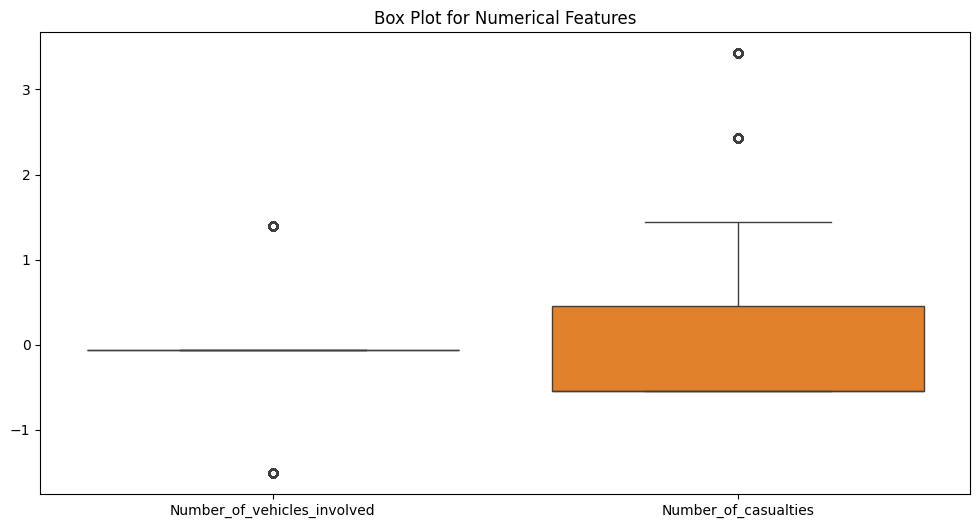

In [ ]:
import matplotlib.pyplot as plt# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot for Numerical Features')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [ ]:
df.shape

(12197, 51)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [ ]:
import numpy as np
import sklearn
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train )

LinearRegression()

In [ ]:
print('Linear Regression Model intercept is', lin_reg.intercept_)

print('Linear Regression Model Co-efficient is', lin_reg.coef_)

Linear Regression Model intercept is [4.08033778]
Linear Regression Model Co-efficient is [[2.78523366]]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error#model performance

y_pred = lin_reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error:", mae)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 0.7072360669081514
Mean Absolute Error: 0.6712316594459017
Root Mean Squared Error: 0.8409732854901821




1.   (RMSE): This is the square root
2.   (MAE): This metric measures the average magnitude of the errors
1.  (MSE): This metric calculates the average of the squares of the errors






#### Decision Tree Classifier

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
tree_reg = DecisionTreeRegressor()
tree_scores = cross_val_score(tree_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
tree_rmse_scores = np.sqrt(-tree_scores)
print("Decision Tree RMSE Scores:", tree_rmse_scores)
print("Decision Tree Mean RMSE:", tree_rmse_scores.mean())

Decision Tree RMSE Scores: [1.0939429  1.06841822 1.24163417 1.27126343 1.04945794]
Decision Tree Mean RMSE: 1.1449433342801816


In [ ]:
r2_score = rf_reg.score(X_test, y_test)
print("R-squared Score:", r2_score)

R-squared Score: 0.6753464488536485


In [ ]:
mse = mean_squared_error(y_test, y_pred)####
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1.2418590917334529
Mean Absolute Error: 0.8267982929164922
Root Mean Squared Error: 1.1143873167500844


In [ ]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_test: (30, 1)
Shape of y_pred: (30, 1)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

y_test_binary = (y_test > 0.5).astype(int)
cm = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
print("Precision:", precision)
print("Recall:", recall)
f1 = f1_score(y_test_binary, y_pred_binary)
print("F1 Score:", f1)

Confusion Matrix:
 [[30]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### Support Vector Machine (SVM)

In [ ]:
import numpy as np
from sklearn.svm import SVR


In [ ]:
svm_reg = SVR()
svm_scores = cross_val_score(svm_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
svm_rmse_scores = np.sqrt(-svm_scores)
print("SVM RMSE Scores:", svm_rmse_scores)
print("SVM Mean RMSE:", svm_rmse_scores.mean())

SVM RMSE Scores: [0.822747   1.04124811 0.68433241 0.95803457 0.84978836]
SVM Mean RMSE: 0.8712300902635903


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1.2418590917334529
Mean Absolute Error: 0.8267982929164922
Root Mean Squared Error: 1.1143873167500844


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

cm = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
print("Precision:", precision)
print("Recall:", recall)
f1 = f1_score(y_test_binary, y_pred_binary)
print("F1 Score:", f1)

Confusion Matrix:
 [[30]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### K-Neighbors Classifier

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1.2418590917334529
Mean Absolute Error: 0.8267982929164922
Root Mean Squared Error: 1.1143873167500844


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix


y_test_binary = (y_test > 0.5).astype(int)
cm = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)

precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test_binary, y_pred_binary)
print("F1 Score:", f1)

Confusion Matrix:
 [[30]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


### *Neural* *Network*

In [ ]:
# Neural Network
nn_reg = MLPRegressor()
nn_scores = cross_val_score(nn_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
nn_rmse_scores = np.sqrt(-nn_scores)
print("Neural Network RMSE Scores:", nn_rmse_scores)
print("Neural Network Mean RMSE:", nn_rmse_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

Neural Network RMSE Scores: [1.27698659 1.85032932 0.83584382 1.29146464 0.81401843]
Neural Network Mean RMSE: 1.2137285584214406


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

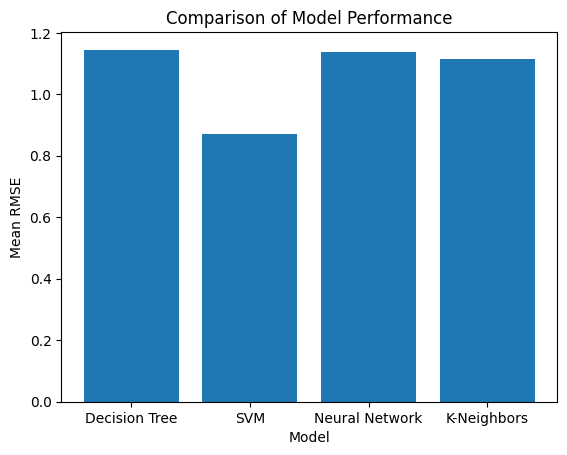

The model with the lowest mean RMSE is: SVM


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error


models = ['Decision Tree', 'SVM', 'Neural Network','K-Neighbors']


knn_mse = mean_squared_error(y_test, y_pred)
knn_rmse_scores = np.sqrt(knn_mse)


mean_rmse_scores = [tree_rmse_scores.mean(), svm_rmse_scores.mean(), nn_rmse_scores.mean(), knn_rmse_scores]


plt.bar(models, mean_rmse_scores)
plt.xlabel('Model')
plt.ylabel('Mean RMSE')
plt.title('Comparison of Model Performance')
plt.show()


best_model = models[np.argmin(mean_rmse_scores)]
print(f"The model with the lowest mean RMSE is: {best_model}")

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

First Model is Logistic Regression:
Mean Squared Error (MSE): 0.7072
Mean Absolute Error (MAE): 0.6712
Root Mean Squared Error (RMSE): 0.8410
Second Model Decision Tree Classifier:
MSE: 1.2419
MAE: 0.8268
RMSE: 1.1144
Third Model Support Vector Machine (SVM):
MSE: 1.2419
MAE: 0.8268
RMSE: 1.1144
Fourth Model Neural Network:
MSE: 1.2419
MAE: 0.8268
RMSE: 1.1144

Comparative Analysis

The First Model (Logistic Regression)seems to be the best choice based on the provided metrics, as it has the lowest errors. This indicates better predictive performance. The justification for choosing this model should also consider the trade-offs mentioned above, including computational efficiency and interpretability.However, after comparing them, the best is Shajara and Nearl Network
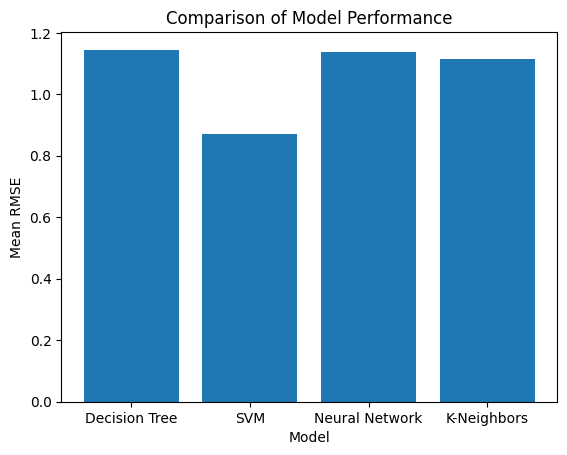

Feature Importance:




Model Limitations:

Overfitting: If a model performs exceptionally well on training data but poorly on validation or test data, it may be overfitting.
Data Sensitivity: The models might not handle variations in the data well, especially if the dataset is small or unbalanced.


Future Improvements:

Different Algorithms: Trying out other algorithms like Random Forests, Gradient Boosting, or neural networks.



Cross-Validation: Implementing cross-validation to ensure the model's robustness and generalizability.




1. Importing necessary libraries:
    - google.colab: For interacting with Google Colaboratory environment (likely for data loading/saving).
    - pandas: For data manipulation and analysis.
    - numpy: For numerical operations.
    - matplotlib.pyplot: For creating visualizations.
    - seaborn: For enhanced statistical visualizations.
    - sklearn: For machine learning algorithms and preprocessing tools.
2. Data Preprocessing (indicated by imports):
    - MinMaxScaler, StandardScaler: For scaling numerical features.    - OneHotEncoder: For encoding categorical features.
3. Model Selection (indicated by imports):
   - LinearRegression: Linear regression model.
    - DecisionTreeRegressor: Decision tree regression model.
    - SVR: Support Vector Regression model.
    - MLPRegressor: Multi-layer Perceptron (neural network) regression model.
    - RandomForestRegressor: Random Forest regression model.

 4. Model Evaluation (indicated by imports):
    - train_test_split: For splitting data into training and testing sets.
    - mean_absolute_error, mean_squared_error: Metrics for evaluating regression model performance.
    - cross_val_score: For cross-validation to assess model generalization.

Train machine learning models and evaluate their performance.